### South German Credit Risk

### Load the data from github url and unzip the csv file

In [4]:
!wget https://github.com/gbiamgaurav/South_German_Credit_Risk/raw/main/notebook/data/dataset.csv
!unzip /content/dataset.csv

--2023-07-31 06:46:05--  https://github.com/gbiamgaurav/South_German_Credit_Risk/raw/main/notebook/data/dataset.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gbiamgaurav/South_German_Credit_Risk/main/notebook/data/dataset.csv [following]
--2023-07-31 06:46:05--  https://raw.githubusercontent.com/gbiamgaurav/South_German_Credit_Risk/main/notebook/data/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275923 (269K) [text/plain]
Saving to: ‘dataset.csv.1’

dataset.csv.1       100%[===================>] 269.46K  --.-KB/s    in 0.02s   

2023-07-31 06:46:06 (13.6 MB/s) - ‘dataset.csv.

In [5]:
### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("/content/dataset.csv")

df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [7]:
print(f"Shape of the data: ", df.shape)

Shape of the data:  (1000, 21)


In [8]:
## Check Metadata

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [9]:
## Check for missing values

df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

## There are no missing values

In [10]:
df["credit_risk"].value_counts()

good    700
bad     300
Name: credit_risk, dtype: int64

In [11]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  1000
Columns  :  21

Features : 
 ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

Missing values :   status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone         

<Axes: xlabel='credit_risk', ylabel='count'>

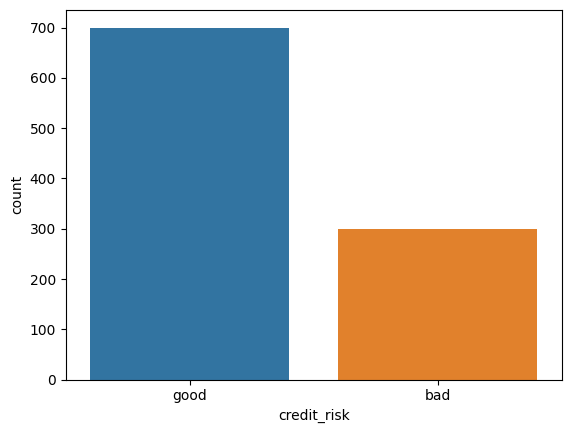

In [12]:
sns.countplot(x="credit_risk", data=df)

In [13]:

# Check for duplicate rows

duplicates = df.duplicated()
print("\nDuplicate rows:")
print(df[duplicates])


Duplicate rows:
Empty DataFrame
Columns: [status, duration, credit_history, purpose, amount, savings, employment_duration, installment_rate, personal_status_sex, other_debtors, present_residence, property, age, other_installment_plans, housing, number_credits, job, people_liable, telephone, foreign_worker, credit_risk]
Index: []

[0 rows x 21 columns]


## There are no duplicated records in the dataset

In [14]:
## numerical columns

numerical_columns = df.select_dtypes(exclude="object").columns

numerical_columns

Index(['duration', 'amount', 'age'], dtype='object')

In [15]:
## Categorical columns

categorical_columns = df.select_dtypes(include="object").columns

categorical_columns

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'credit_risk'],
      dtype='object')

## Univariate Analysis of Numerical Columns

In [16]:
def visualize_numerical_features(df):
    numerical_features = df.select_dtypes(include=['int64', 'float64'])

    num_cols = len(numerical_features.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4*num_rows))

    for i, feature in enumerate(numerical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.histplot(data=df, x=feature, kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Frequency")

    # Hide empty subplots if the number of features is odd
    if num_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()
    plt.show()

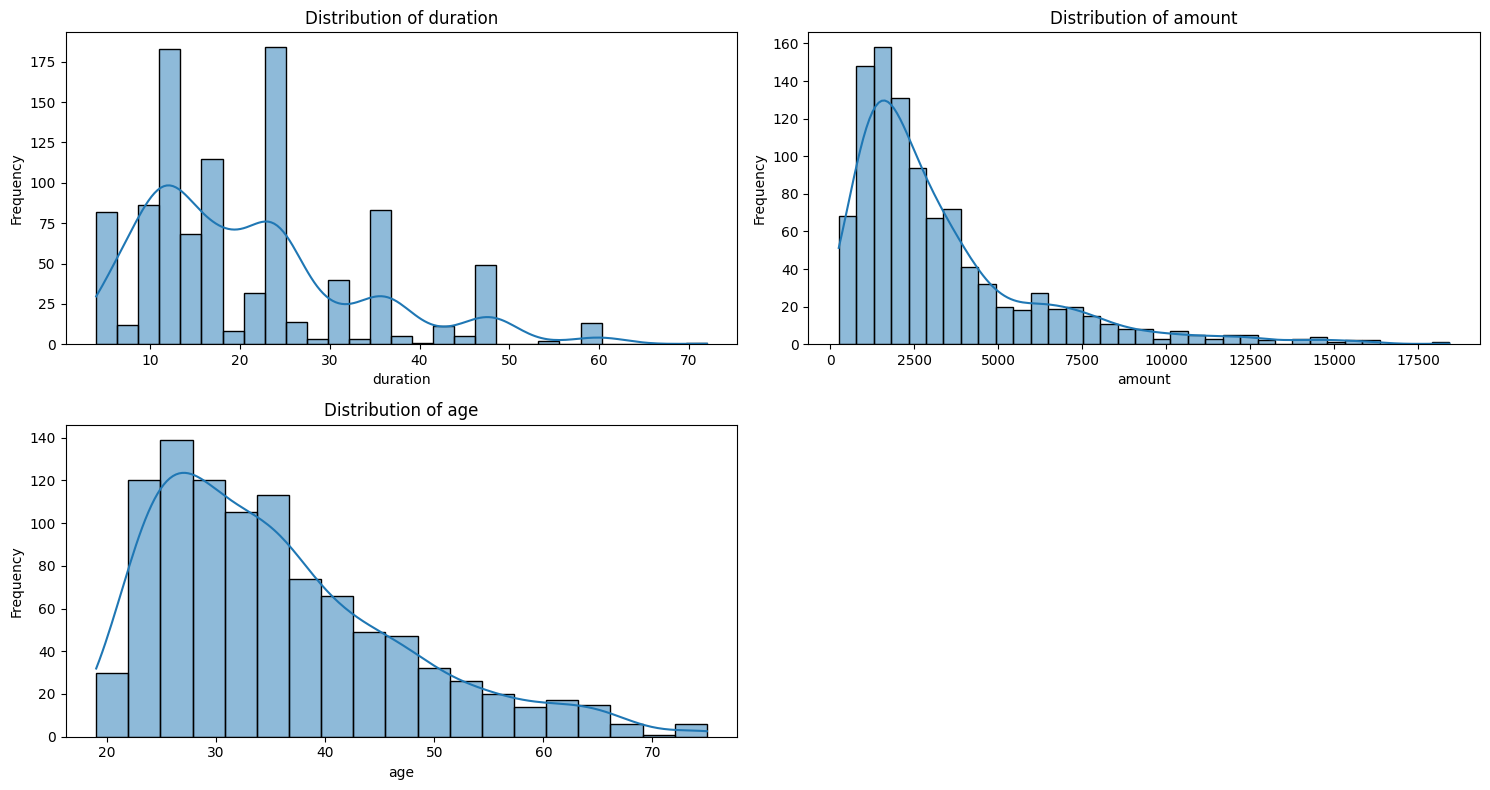

In [17]:
visualize_numerical_features(df)

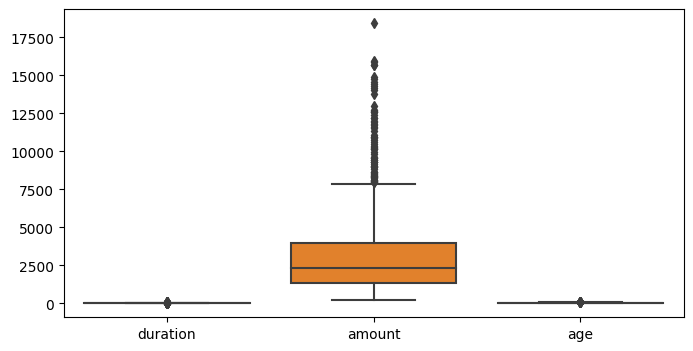

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(df)
plt.show()

## There are outliers in the dataset which we will treat later

## Univariate analysis of Categorical features

In [19]:
## Categorical features

def visualize_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'category'])

    cat_cols = len(categorical_features.columns)
    cat_rows = (cat_cols // 2) + (cat_cols % 2)

    fig, axes = plt.subplots(cat_rows, 2, figsize=(12, 4*cat_rows))

    for i, feature in enumerate(categorical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.countplot(x=feature, data=df, ax=ax)
        ax.set_title(f"Countplot of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")

    # Hide empty subplots if the number of features is odd
    if cat_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()


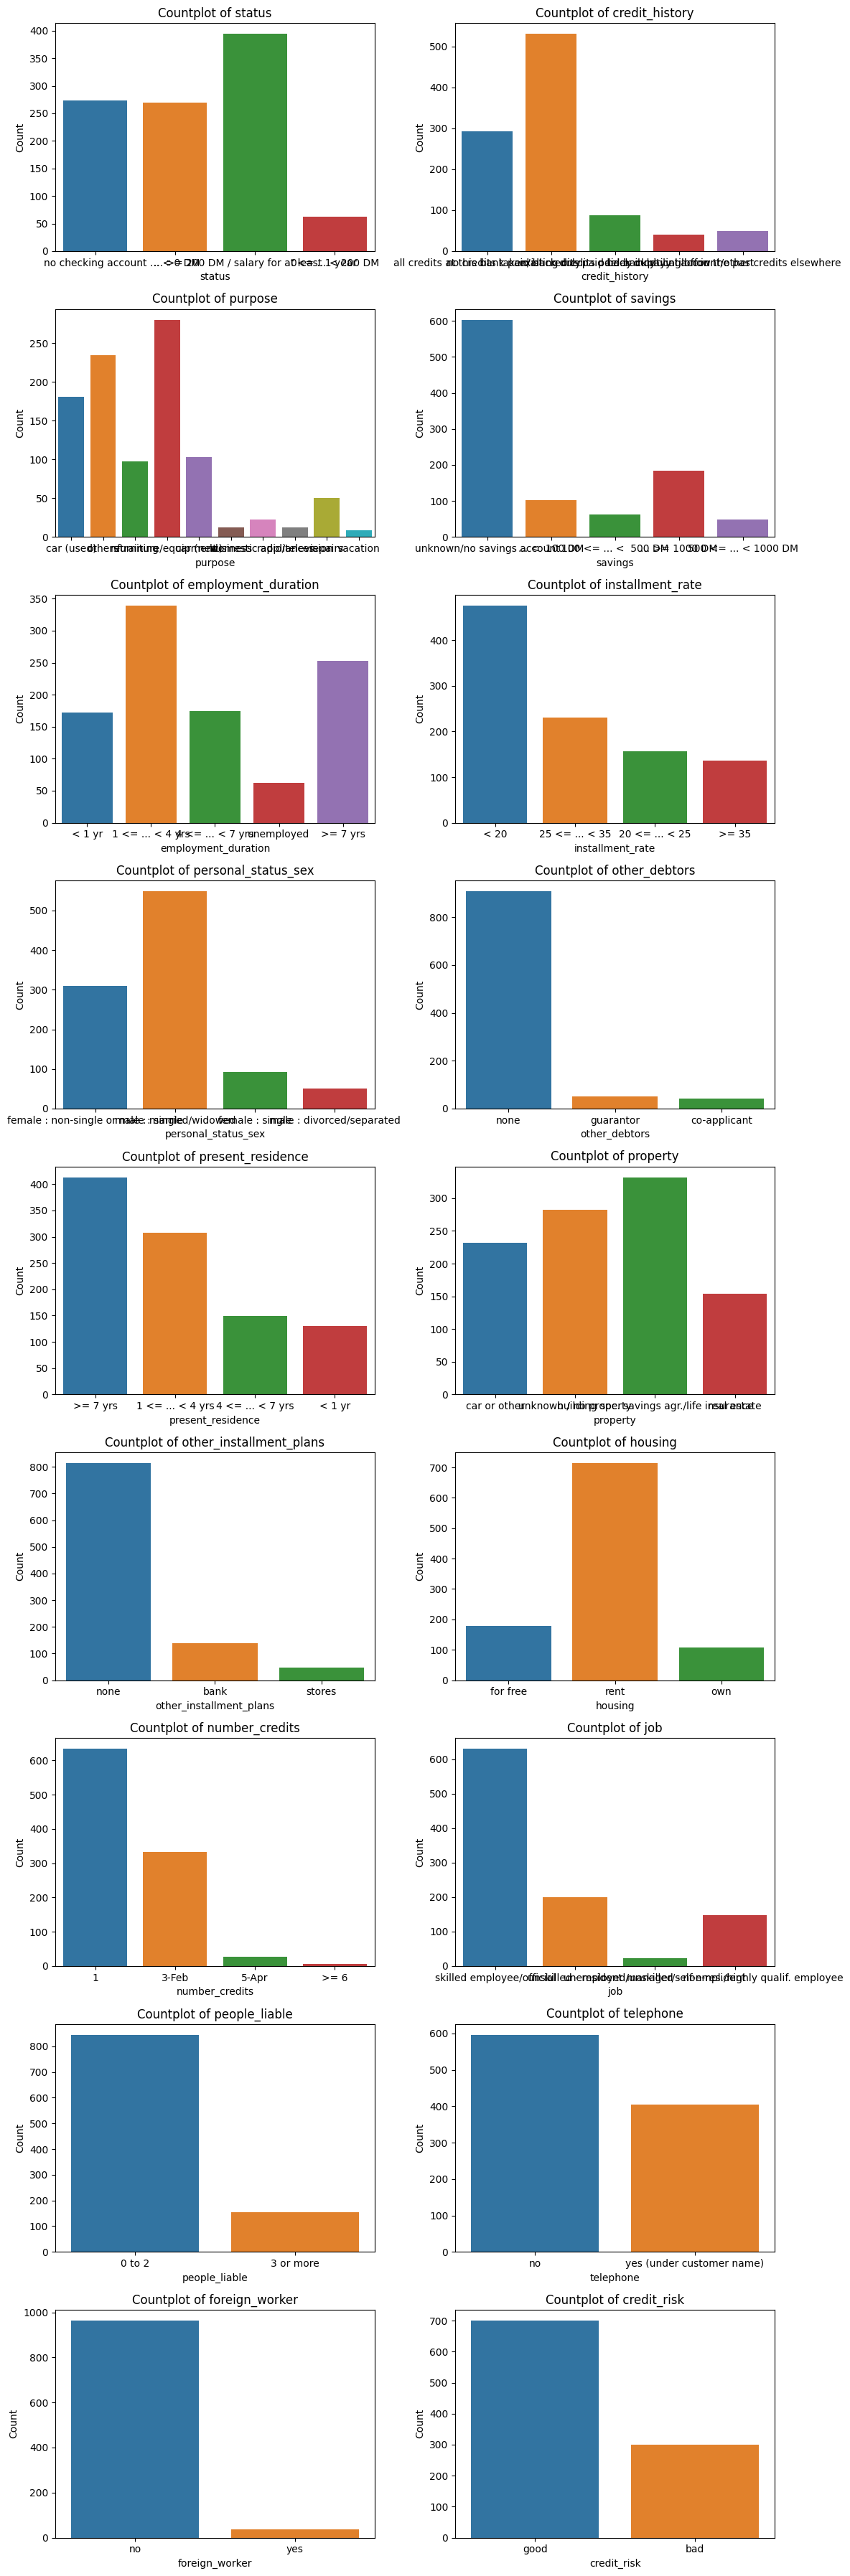

In [20]:
visualize_categorical_features(df)

## Check Multicollinearity in the dataset

In [21]:
def check_multicollinearity(df, threshold=0.8):
    df = pd.DataFrame(df)  # Convert dataset to a DataFrame if needed
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    corr_matrix = df_numeric.corr().abs()  # Calculate the correlation matrix
    cols = corr_matrix.columns
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    # Plotting the correlation heatmap
    plt.figure(figsize=(15,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features


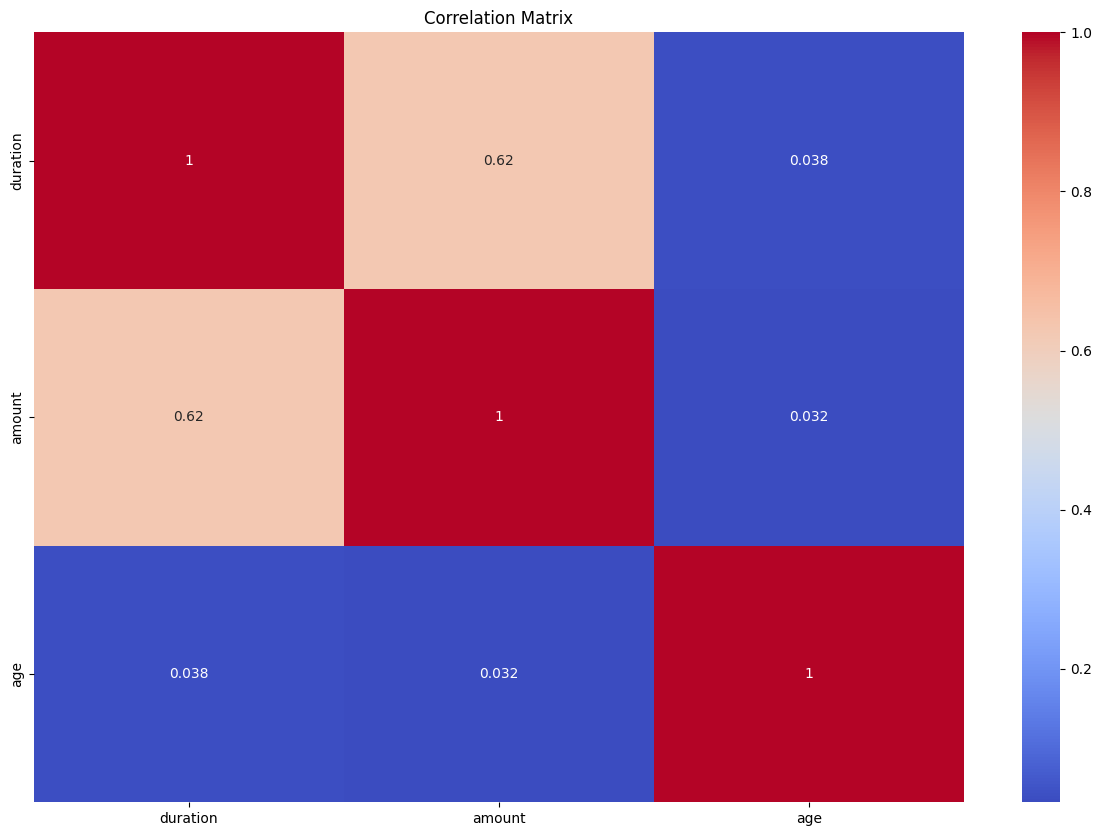

-----------------------------------------------
Multicollinear columns: set()


In [22]:
multicollinear_cols = check_multicollinearity(df)

print("-----------------------------------------------")

print("Multicollinear columns:", multicollinear_cols)

## There are no multicollinear features

In [23]:
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [24]:
df.shape

(1000, 21)

In [25]:
## Check for Outliers

def detect_outliers(df, columns, threshold=3):
    columns_with_outliers = []

    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        if not column_outliers.empty:
            columns_with_outliers.append(column)
            print(f"Outliers found in column '{column}'.")

    if not columns_with_outliers:
        print("No outliers found.")

    return columns_with_outliers

In [26]:
num_features = df.select_dtypes(exclude="object").columns

num_features

Index(['duration', 'amount', 'age'], dtype='object')

In [27]:
outlier_columns = detect_outliers(df,  columns = num_features, threshold=3)

print(f"Columns with outliers: {outlier_columns}")

Outliers found in column 'duration'.
Outliers found in column 'amount'.
Columns with outliers: ['duration', 'amount']


In [28]:
df["duration"].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
45      5
39      5
7       5
14      4
13      4
28      3
33      3
54      2
22      2
16      2
5       1
47      1
26      1
72      1
40      1
Name: duration, dtype: int64

In [29]:
df.shape

(1000, 21)

In [30]:
## Drop the Outliers

def drop_outliers(df, columns, threshold=3, save_clean_df=True):
    columns_with_outliers = []

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

            if not column_outliers.empty:
                columns_with_outliers.append(column)
                print(f"Outliers found in column '{column}'.")
                # Drop outliers from the DataFrame
                df = df[~df.index.isin(column_outliers.index)]
        else:
            print(f"Skipping column '{column}' as it contains non-numeric data.")

    if not columns_with_outliers:
        print("No outliers found.")
    else:
        print("Outliers dropped from the DataFrame.")

    if save_clean_df:
        clean_df_filename = "clean_dataframe.csv"  # Change this to your desired filename
        df.to_csv(clean_df_filename, index=False)
        print(f"Clean DataFrame saved to '{clean_df_filename}'.")

    raw_data = df.copy()

    return df, raw_data



columns = df.columns
threshold = 3

# Call the function to drop outliers from the DataFrame and save the clean DataFrame
clean_data, raw_data = drop_outliers(df, columns, threshold)

print("Original DataFrame:")
print(raw_data)

print("\nDataFrame without outliers:")
print(clean_data)

Skipping column 'status' as it contains non-numeric data.
Outliers found in column 'duration'.
Skipping column 'credit_history' as it contains non-numeric data.
Skipping column 'purpose' as it contains non-numeric data.
Outliers found in column 'amount'.
Skipping column 'savings' as it contains non-numeric data.
Skipping column 'employment_duration' as it contains non-numeric data.
Skipping column 'installment_rate' as it contains non-numeric data.
Skipping column 'personal_status_sex' as it contains non-numeric data.
Skipping column 'other_debtors' as it contains non-numeric data.
Skipping column 'present_residence' as it contains non-numeric data.
Skipping column 'property' as it contains non-numeric data.
Skipping column 'other_installment_plans' as it contains non-numeric data.
Skipping column 'housing' as it contains non-numeric data.
Skipping column 'number_credits' as it contains non-numeric data.
Skipping column 'job' as it contains non-numeric data.
Skipping column 'people_lia

In [31]:
clean_data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [32]:
clean_data.shape

(975, 21)

In [33]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   975 non-null    object
 1   duration                 975 non-null    int64 
 2   credit_history           975 non-null    object
 3   purpose                  975 non-null    object
 4   amount                   975 non-null    int64 
 5   savings                  975 non-null    object
 6   employment_duration      975 non-null    object
 7   installment_rate         975 non-null    object
 8   personal_status_sex      975 non-null    object
 9   other_debtors            975 non-null    object
 10  present_residence        975 non-null    object
 11  property                 975 non-null    object
 12  age                      975 non-null    int64 
 13  other_installment_plans  975 non-null    object
 14  housing                  975 non-null    o

In [34]:
## define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]

categorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))

print("----------------------------------------------------------------------------------")

print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['duration', 'amount', 'age']
----------------------------------------------------------------------------------
We have 18 categorical features: ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']


In [35]:
## Checking the duplicate columns
print("Number of duplicates: ", clean_data.duplicated().sum())
print("Unique values per column:")
clean_data.nunique()

Number of duplicates:  0
Unique values per column:


status                       4
duration                    32
credit_history               5
purpose                     10
amount                     898
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

In [36]:
df = clean_data.copy()

df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [37]:
## Checking for null values

df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [38]:
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [39]:
df["employment_duration"].value_counts()

1 <= ... < 4 yrs    331
>= 7 yrs            246
< 1 yr              170
4 <= ... < 7 yrs    170
unemployed           58
Name: employment_duration, dtype: int64

In [40]:
df["installment_rate"].value_counts()

< 20              469
25 <= ... < 35    222
20 <= ... < 25    154
>= 35             130
Name: installment_rate, dtype: int64

In [41]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


### Data Preprocessing using Pipeline anc ColumnTransformers

In [42]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder, LabelEncoder, RobustScaler

In [43]:
numerical_columns = df.select_dtypes(exclude="object").columns

numerical_columns

Index(['duration', 'amount', 'age'], dtype='object')

In [44]:
categorical_columns = df.select_dtypes(include="object").columns


categorical_columns

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'credit_risk'],
      dtype='object')

### Divide the dataset into Independent and Dependent features

In [45]:
X = df.drop(columns=["credit_risk"], axis=1)

y = df["credit_risk"]

In [46]:
X.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes


In [47]:
y.head()

0    good
1    good
2    good
3    good
4    good
Name: credit_risk, dtype: object

In [48]:
y.value_counts()

good    693
bad     282
Name: credit_risk, dtype: int64

In [49]:
## Mannually encoding the Target variable

y= y.replace({'good': 1, 'bad': 0})

In [50]:
y.value_counts()

1    693
0    282
Name: credit_risk, dtype: int64

In [51]:
## Define numerical and categorical features

## Numerical features

numeric_features = X.select_dtypes(exclude="object").columns
numeric_features

Index(['duration', 'amount', 'age'], dtype='object')

In [52]:
## Categorical features

categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone',
       'foreign_worker'],
      dtype='object')

In [53]:
## Encode the categorical features

from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(), categorical_features),
    ("RobustScaler", RobustScaler(), numeric_features)
], remainder="drop")

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train = transformer.fit_transform(X_train)

In [56]:
X_test = transformer.transform(X_test)

In [57]:
X_train.shape, X_test.shape

((780, 20), (195, 20))

In [58]:
X_test

array([[ 1.        ,  4.        ,  4.        , ...,  1.        ,
         0.01955799, -0.21428571],
       [ 2.        ,  4.        ,  5.        , ...,  0.5       ,
        -0.52258948,  0.35714286],
       [ 1.        ,  4.        ,  4.        , ..., -0.5       ,
        -0.12517113, -0.14285714],
       ...,
       [ 1.        ,  3.        ,  8.        , ...,  0.25      ,
         0.11617446,  0.57142857],
       [ 3.        ,  4.        ,  4.        , ..., -0.5       ,
        -0.61881479,  0.5       ],
       [ 3.        ,  0.        ,  4.        , ...,  0.        ,
        -0.15763739, -0.07142857]])

In [59]:
X_train

array([[ 3.        ,  0.        ,  5.        , ...,  0.        ,
         0.65832192,  0.        ],
       [ 3.        ,  4.        ,  4.        , ..., -0.5       ,
        -0.02699003, -0.64285714],
       [ 3.        ,  3.        ,  5.        , ...,  0.5       ,
         1.01193037,  1.42857143],
       ...,
       [ 0.        ,  1.        ,  7.        , ...,  0.5       ,
        -0.17445727,  0.07142857],
       [ 3.        ,  0.        ,  8.        , ...,  0.75      ,
         0.06219441,  0.71428571],
       [ 0.        ,  3.        ,  8.        , ...,  0.5       ,
         0.95012713,  0.07142857]])

### Initialize the Default models in a dictionary

In [60]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.5 MB/s eta 0:00:00


In [61]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [62]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

### Create function for Model Training and Evaluation

In [63]:
from sklearn.metrics import (accuracy_score,
                             f1_score, precision_score, recall_score,
                             roc_auc_score)

In [64]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [65]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: DataFrame which contains a report of all models metrics with cost
    '''
    # Separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models_list = []
    accuracy_list = []
    f1_score_list = []
    precision_list = []
    recall_list = []
    rocauc_score_list = []

    for model_name, model in models.items():
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)

        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        print(model_name)
        models_list.append(model_name)

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))

        print('=' * 35)
        print('\n')

        accuracy_list.append(model_test_accuracy)
        f1_score_list.append(model_test_f1)
        precision_list.append(model_test_precision)
        recall_list.append(model_test_recall)
        rocauc_score_list.append(model_test_rocauc_score)

    report = pd.DataFrame({
        'Model Name': models_list,
        'Accuracy': accuracy_list,
        'F1 Score': f1_score_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'ROC AUC Score': rocauc_score_list
    }).sort_values(by='Precision', ascending=False)

    return report

In [66]:
report = evaluate_models(X_train, y_train, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7628
- F1 score: 0.8549
- Precision: 0.7842
- Recall: 0.9397
- ROC AUC Score: 0.5948


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.6603
- F1 score: 0.7623
- Precision: 0.7944
- Recall: 0.7328
- ROC AUC Score: 0.5914


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9311
- F1 score: 0.9527
- Precision: 0.9213
- Recall: 0.9863
- ROC AUC Score: 0.8932
----------------------------------
Model performance for Test set
- Accuracy: 0.7692
- F1 score: 0.8512
- Precision: 0.8175
- Recall: 0.8879
- ROC AUC Score: 0.6565


Logistic Regression
Model performance for Training 

In [67]:
report

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
5,XGBClassifier,0.794872,0.865546,0.844262,0.887931,0.706466
7,AdaBoost Classifier,0.794872,0.867769,0.833333,0.905172,0.690086
2,Gradient Boosting,0.769231,0.851240,0.817460,0.887931,0.656466
6,CatBoosting Classifier,0.769231,0.853659,0.807692,0.905172,0.640086
3,Logistic Regression,0.756410,0.846774,0.795455,0.905172,0.615086
1,Decision Tree,0.660256,0.762332,0.794393,0.732759,0.591379
0,Random Forest,0.762821,0.854902,0.784173,0.939655,0.594828
4,K-Neighbors Classifier,0.730769,0.832000,0.776119,0.896552,0.573276


### Hyper parameter tuning using Optuna

In [68]:
from sklearn.model_selection import KFold

!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.9 MB/s eta 0:00:00


In [69]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

def xgb_objective(trial):
    # Use the trial object to suggest values for the XGBClassifier hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=100)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.1)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)

    # Define the model with the suggested hyperparameters
    xgb = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
    )

    # Calculate the score with 10-fold cross-validation, which returns a list of scores
    # Scoring is set to "accuracy" for classification tasks
    scores = cross_val_score(
        xgb,
        X_train,
        y_train,
        cv=KFold(n_splits=10, shuffle=True, random_state=42),
        scoring="f1",
        error_score="raise"
    )

    # Return the mean of 10 scores
    return scores.mean()

In [70]:
# Create Study object
study = optuna.create_study(direction="maximize")

# Optimize the study, use more trials to obtain a better result, use fewer trials to be more cost-efficient
study.optimize(xgb_objective, n_trials=10)  # Use more trials for better results

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f"Best score: {best_score}\n")
print(f"Optimized parameters: {best_params}\n")

[I 2023-07-31 06:46:51,165] A new study created in memory with name: no-name-c7b550d6-1e01-4e1f-9355-75e029e6efc2
[I 2023-07-31 06:46:56,247] Trial 0 finished with value: 0.8362122618906913 and parameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.05567068297129244, 'min_child_weight': 8, 'subsample': 0.7403212556982007, 'colsample_bytree': 0.9178851773020069}. Best is trial 0 with value: 0.8362122618906913.
[I 2023-07-31 06:46:56,988] Trial 1 finished with value: 0.8486977901791404 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.04196735551054391, 'min_child_weight': 9, 'subsample': 0.8713989062417402, 'colsample_bytree': 0.798134896464043}. Best is trial 1 with value: 0.8486977901791404.
[I 2023-07-31 06:47:00,786] Trial 2 finished with value: 0.8490533655902965 and parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.067904047100982, 'min_child_weight': 3, 'subsample': 0.8527582498462358, 'colsample_bytree': 0.9586346276270101}

Best score: 0.8555545816191404

Optimized parameters: {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.013784587420998924, 'min_child_weight': 9, 'subsample': 0.9908151977086621, 'colsample_bytree': 0.9233107834860663}



In [71]:
xgb = XGBClassifier(
    n_estimators = 300,
    max_depth = 8,
    min_child_weight = 6,
    learning_rate = 0.01781869742819414,
    subsample = 0.8777480785503919,
    colsample_bytree = 0.7528377586428419

)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7528377586428419, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01781869742819414,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
## Predictions

y_preds = xgb.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Assuming you have true labels y_test and predicted labels y_preds
print("Accuracy: ", accuracy_score(y_test, y_preds))
print("Precision: ", precision_score(y_test, y_preds))
print("Recall: ", recall_score(y_test, y_preds))
print("F1 Score: ", f1_score(y_test, y_preds))
print("AUC-ROC: ", roc_auc_score(y_test, y_preds))
print("AUC-PR: ", average_precision_score(y_test, y_preds))


Accuracy:  0.7282051282051282
Precision:  0.7707006369426752
Recall:  0.8768115942028986
F1 Score:  0.8203389830508476
AUC-ROC:  0.6226163234172388
AUC-PR:  0.7629387413103836


In [74]:
print("Final XGB Classifier Accuracy Score (Train) :", xgb.score(X_train,y_train))
print("Final XGB Classifier Accuracy Score (Test) :", accuracy_score(y_preds,y_test))

print("--------------------------------------------------------------------------------------")

print("Final XGB Classifier Accuracy Score (Train) :", xgb.score(X_train,y_train))
print("Final XGB Classifier Precision Score (Test) :", precision_score(y_preds,y_test))

print("----------------------------------------------------------------------------------------")

print("Final XGB Classifier Accuracy Score (Train) :", xgb.score(X_train,y_train))
print("Final XGB Classifier F1 Score (Test) :", f1_score(y_preds,y_test, average="weighted"))

Final XGB Classifier Accuracy Score (Train) : 0.8858974358974359
Final XGB Classifier Accuracy Score (Test) : 0.7282051282051282
--------------------------------------------------------------------------------------
Final XGB Classifier Accuracy Score (Train) : 0.8858974358974359
Final XGB Classifier Precision Score (Test) : 0.8768115942028986
----------------------------------------------------------------------------------------
Final XGB Classifier Accuracy Score (Train) : 0.8858974358974359
Final XGB Classifier F1 Score (Test) : 0.7466318991742722


In [75]:
from sklearn.metrics import confusion_matrix

# Import the ConfusionMatrixDisplay function
from sklearn.metrics import ConfusionMatrixDisplay

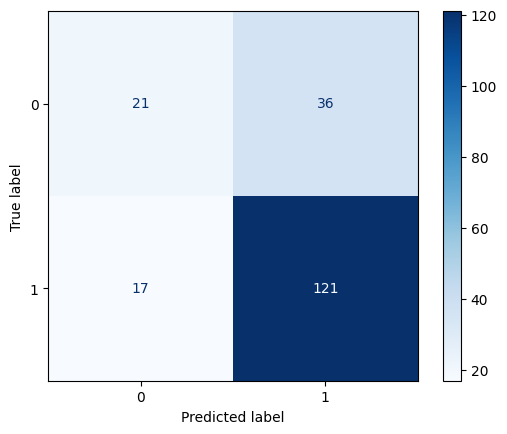

In [76]:
#plots Confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_preds))
disp.plot(cmap="Blues")